In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# from colorsetup import colors, palette
# sns.set_palette(palette)

In [2]:
df = pd.read_csv(r'Human_Activity_Recognition_Using_Smartphones_Data.csv')

##### We check the the shape of the data frame. Also we check the data types and the breakdown of the data basis each activity.

In [3]:
df.shape

(10299, 562)

In [4]:
df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,10289,10290,10291,10292,10293,10294,10295,10296,10297,10298
tBodyAcc-mean()-X,0.288585,0.278419,0.279653,0.279174,0.276629,0.277199,0.279454,0.277432,0.277293,0.280586,...,0.305631,0.321443,0.267413,0.147146,0.192275,0.310155,0.363385,0.349966,0.237594,0.153627
tBodyAcc-mean()-Y,-0.0202942,-0.0164106,-0.0194672,-0.0262006,-0.0165697,-0.0100979,-0.0196408,-0.0304883,-0.0217507,-0.0099603,...,-0.0527017,-0.0237993,-0.0215959,-0.0469079,-0.0336426,-0.0533913,-0.039214,0.0300774,0.0184669,-0.0184365
tBodyAcc-mean()-Z,-0.132905,-0.12352,-0.113462,-0.123283,-0.115362,-0.105137,-0.110022,-0.12536,-0.120751,-0.106065,...,-0.155684,-0.119695,-0.0705496,-0.0693382,-0.105949,-0.0991087,-0.105915,-0.115788,-0.0964989,-0.137018
tBodyAcc-std()-X,-0.995279,-0.998245,-0.99538,-0.996091,-0.998139,-0.997335,-0.996921,-0.996559,-0.997328,-0.994803,...,-0.343078,-0.336548,-0.323426,-0.348686,-0.354841,-0.287866,-0.305388,-0.329638,-0.323114,-0.330046
tBodyAcc-std()-Y,-0.983111,-0.9753,-0.967187,-0.983403,-0.980817,-0.990487,-0.967186,-0.966728,-0.961245,-0.972758,...,-0.15125,-0.183307,-0.118042,0.018057,-0.0925043,-0.140589,0.0281477,-0.0421429,-0.229775,-0.195253


In [5]:
df.dtypes.value_counts()

float64    561
object       1
dtype: int64

###### Hence we have all the columns as float and the activity column is the only categorical column which is our target variable.

In [6]:
##Breakdown
df.groupby('Activity').agg({'Activity': 'count'})

,Activity
Activity,
LAYING,1944
SITTING,1777
STANDING,1906
WALKING,1722
WALKING_DOWNSTAIRS,1406
WALKING_UPSTAIRS,1544


##### Now we check if some feature scaling is required in the floating values apart from the target variable. After looking at the values we note that the values are all scaled between -1 to 1 as those are the maximum and the minimum values. Hence the values are seem scaled.

In [7]:
print(df.iloc[:,:-1].max().value_counts())
print('-'*80)
print(df.iloc[:,:-1].min().value_counts())

1.0    561
dtype: int64
--------------------------------------------------------------------------------
-1.0    561
dtype: int64


### Encoding the Activity column

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Activity'] = le.fit_transform(df['Activity'])

In [9]:
# We check some random values to see if it has successfully implemented.
df['Activity'].sample(5)

7514     2
957      4
9427     1
3866     0
10245    4
Name: Activity, dtype: int32

###### We calculate the correlations between different features and look for multicollinearity.

In [10]:
feature_cols = df.columns[:-1] ##Gives an index hashable array
correlation = df[feature_cols].corr()

* Since there are many columns we can cut down the correlation data frame from the diagonal as the values are the same before and after the diagonal

In [11]:
trill = np.tril_indices_from(correlation) ##Gives the indices that shall be converted to null values
trill

(array([  0,   1,   1, ..., 560, 560, 560], dtype=int64),
 array([  0,   0,   1, ..., 558, 559, 560], dtype=int64))

In [12]:
for c in zip(*trill):
    correlation.iloc[c[0],c[1]] = np.NaN
    
# Stack the data and convert to a data frame so that we do not have huge number of columns!!
correlation = correlation.stack().to_frame().reset_index()

In [13]:
corr_values = correlation.rename(columns={'level_0':'feature-1','level_1':'feature-2',0:'correlations'})
corr_values

,feature-1,feature-2,correlations
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071
...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231


#### Now we create a histogram after computing the absolute values of the correlation.

In [14]:
corr_values['abs_Corr'] = np.absolute(corr_values.correlations)

In [15]:
corr_values.head(3) #Hence we have the absolute values.

,feature-1,feature-2,correlations,abs_Corr
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302,0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590,0.004590


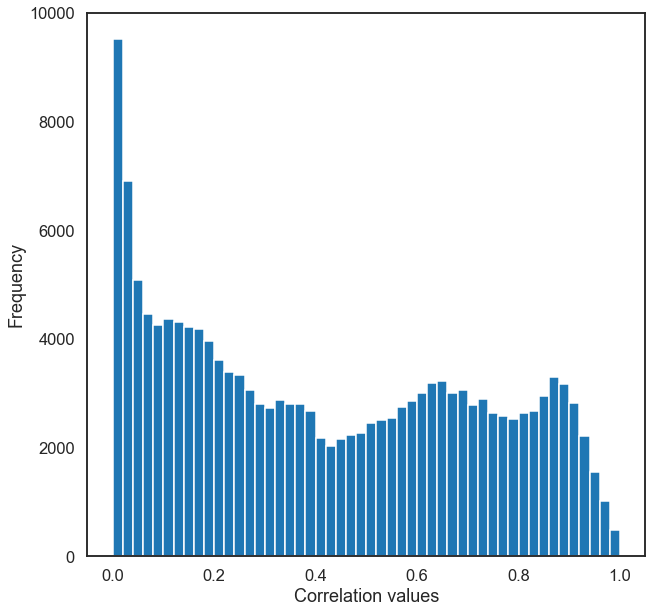

In [16]:
##Plot
sns.set_context('talk')
sns.set_style('white')
plt.figure(figsize=(10,10))
plt.hist(corr_values['abs_Corr'], bins=50)
plt.xlabel('Correlation values')
plt.ylabel('Frequency')
plt.show()

In [17]:
highest_corr = corr_values.sort_values(by = ['abs_Corr'],ascending=False)

In [18]:
## Hence we have the highest correlated values.
highest_corr[highest_corr.abs_Corr > 0.8]

,feature-1,feature-2,correlations,abs_Corr
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
96017,tBodyAccMag-arCoeff()3,tGravityAccMag-arCoeff()3,1.000000,1.000000
94964,tBodyAccMag-entropy(),tGravityAccMag-entropy(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
93546,tBodyAccMag-min(),tGravityAccMag-min(),1.000000,1.000000
...,...,...,...,...
9895,tBodyAcc-energy()-Y,fBodyBodyGyroMag-std(),0.800024,0.800024
50659,tBodyAccJerk-iqr()-X,tBodyGyroJerk-max()-Y,0.800019,0.800019
115040,fBodyAcc-std()-Z,fBodyGyro-std()-X,0.800002,0.800002
93597,tBodyAccMag-min(),fBodyAcc-std()-X,0.800001,0.800001


### Now we split the data into training and test sets by the method `StratifiedShuffleSplit` in order to maintain the ratio of the classes in both the training as well as the test sets. 

#### Stratified sampling in statistics refers to extracting random sample from each stratum in a number proportional to the stratum's size when compared to the population. These subsets of the strata are then pooled to form a random sample.

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified_split_var = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)
#It gives the indexes; random state is used to ensure that the split indexes remain the same whenever 42 is inputted

train_index,test_index = next(stratified_split_var.split(df[feature_cols],df['Activity']))

In [20]:
## Now we assign the indices to the training and the test sets to retrieve from the data frame

x_train = df.loc[train_index,feature_cols]
y_train = df.loc[train_index,'Activity']

x_test = df.loc[test_index,feature_cols]
y_test = df.loc[test_index,'Activity']


In [21]:
print(y_train.value_counts(normalize=True))
print('-'*100)
print(y_test.value_counts(normalize=True))

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64
----------------------------------------------------------------------------------------------------
0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64


`Here we observe that it is a multi class model` 
###### We fit the logistic regression model without any regularizations initially and check its effects. The solver will have 'liblinear' as the parameter as we look for fitting a model using one vs all algorithm - used in the cases of Multi class classification models where the idea is that each of the classes are taken versus all other classes clubbed together.

In [22]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression(solver = 'liblinear') 
#The liblinear solver supports both L1 and L2 regularization, with a dual formulation only for the L2 penalty
lor.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

### Now we apply the regularized logistic regressions by invoking the L1 and the L2 penalties.

In [23]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lor_l1 = LogisticRegressionCV(Cs=10,cv=4,solver='liblinear',penalty='l1')
lor_l1.fit(x_train,y_train)

LogisticRegressionCV(cv=4, penalty='l1', solver='liblinear')

In [24]:
# L2 regularized logistic regression
lor_l2 = LogisticRegressionCV(Cs=10,cv=4,solver='liblinear',penalty='l2')
lor_l2.fit(x_train,y_train)

LogisticRegressionCV(cv=4, solver='liblinear')

##### Now we compare the coefficients of each of our models with the other.

In [25]:
coefficients = []

coef_model = [lor,lor_l1,lor_l2]
coef_label = ['lr','l1','l2']

for lab,mod in zip(coef_label,coef_model):
    coeff = mod.coef_ ##This gives us the log odds
    coeff_exp = np.exp(coeff) ##We concvert the log odds into regular odds to make more sense out of them.
    coeffi_label = pd.MultiIndex(levels=[[lab],[0,1,2,3,4,5]],codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeff_exp.T,columns=coeffi_label))
    
coefficients = pd.concat(coefficients,axis=1)
coefficients
    

lr                                                            l1  \
            0         1         2         3         4         5           0   
0    0.916213  0.640680  1.294292  0.844268  2.150308  0.923039    0.991859   
1    1.014598  0.817874  1.062784  0.976765  1.114011  0.780990    1.000000   
2    1.030647  1.065236  1.278783  1.022590  1.060754  0.668629    1.000000   
3    1.004601  0.480003  0.702766  0.495926  1.306019  2.005955    1.000000   
4    0.955609  0.966422  0.636450  1.297250  0.596400  1.112097    1.000000   
..        ...       ...       ...       ...       ...       ...         ...   
556  0.978111  0.517126  1.734346  0.790625  1.469877  0.703638    1.000000   
557  1.060196  0.781165  1.308649  0.850432  0.854189  1.190237    1.000000   
558  4.948600  0.084324  0.425448  0.731146  0.490321  1.516358  116.129980   
559  0.687762  0.476925  5.879401  0.784347  0.759467  2.403024    0.746700   
560  0.828358  0.742285  1.517281  1.067208  0.958522  1.550869    1.000000   

                                                               l2             \
            1         2         3          4         5          0          1   
0    1.000000  1.000000  1.000000  57.117992  1.000000   0.873469   0.259646   
1    1.000000  1.000000  1.000000   1.000000  1.000000   1.029769   0.320714   
2    1.000000  1.000000  1.000000   1.000000  1.000000   1.041416   0.241716   
3    0.187868  0.645083  0.452310   1.000000  8.866214   1.019275   0.077093   
4    1.000000  0.266008  1.000000   0.220389  1.000000   0.964653   1.831480   
..        ...       ...       ...        ...       ...        ...        ...   
556  0.464770  1.625320  0.869849   1.642019  0.483257   0.867077   0.440379   
557  0.510375  2.376034  0.923537   0.973334  1.456430   1.126537   0.507954   
558  0.000277  1.000000  1.000000   0.431146  1.008057  19.087406   0.000067   
559  1.000000  1.000000  1.000000   1.000000  4.705422   0.580969  18.808722   
560  1.000000  1.000000  1.000000   1.000000  3.782085   0.793936   2.428609   

                                             
            2         3         4         5  
0    1.623519  0.619417  6.234809  1.030206  
1    1.112795  0.857337  1.204927  0.591680  
2    1.591011  1.144016  1.009820  0.384892  
3    0.647270  0.167155  1.321385  5.815080  
4    0.513822  2.466596  0.377313  1.075302  
..        ...       ...       ...       ...  
556  1.793898  0.531501  1.901371  0.535605  
557  1.578699  0.614838  0.862421  1.423487  
558  0.397398  0.434914  0.231533  2.429870  
559  9.208131  0.390412  0.516590  7.575745  
560  1.765927  1.138519  0.919477  2.778705  

[561 rows x 18 columns]

##### Here we plot the coefficients from all the three models that we have fitted. We see the strength of the coefficients which vary in terms of weight if regularized techniques are used

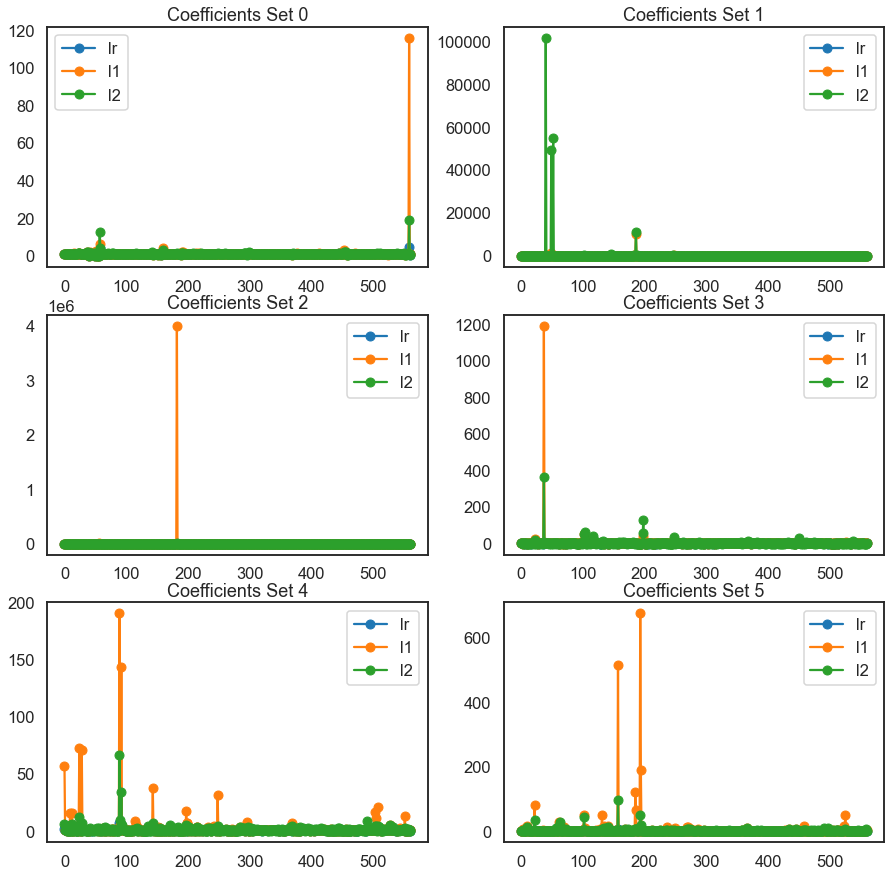

In [61]:
fig,axes = plt.subplots(nrows=3,ncols=2)
axes = axes.flatten()
fig.set_size_inches(15,15)

for a in enumerate(axes):
    lab = a[0]
    ax = a[1]
    d = coefficients.xs(lab,level=1,axis=1)
    d.plot(ax=ax,title = 'Coefficients Set'+ ' ' +str(lab),legend=True, marker='o')

###### We make predictions for each of the model and check its accuracy further. Also note that we store the porbabilities of each of the classes in each of the models.

In [186]:
y_pred = []
y_prob = []

coef_model = [lor,lor_l1,lor_l2]
coef_label = ['lr','l1','l2']

#For predictions
for lab,mod in zip(coef_label,coef_model):
    y_pred.append(pd.Series(mod.predict(x_test),name = str(lab)))
    
y_pred = pd.concat(y_pred,axis=1)
print(y_pred.head())


print('-'*125)

#For probabilities
y_prob=[]
for mod in coef_model:
    y_prob.append(pd.DataFrame(mod.predict_proba(x_test)))
    
y_prob = pd.concat(y_prob,axis=1)
y_prob.head()

   lr  l1  l2
0   3   3   3
1   5   5   5
2   3   3   3
3   1   1   1
4   0   0   0
-----------------------------------------------------------------------------------------------------------------------------


,0,1,2,3,4,5,0,1,2,3,4,5,0,1,2,3,4,5
0,0.000034,1.683471e-04,5.675971e-04,9.989388e-01,0.000006,2.845349e-04,0.000034,5.499924e-06,1.096433e-03,9.988641e-01,5.490681e-10,2.977904e-08,1.236526e-07,2.156679e-08,2.425560e-04,9.997567e-01,3.828203e-09,6.047180e-07
1,0.000037,3.211741e-07,4.237867e-06,1.425050e-04,0.011650,9.881653e-01,0.000044,9.251693e-09,1.229141e-07,3.362444e-05,4.622893e-04,9.994598e-01,2.671231e-07,4.947483e-14,1.393998e-07,1.036767e-09,5.224838e-04,9.994771e-01
2,0.000036,4.352809e-03,2.962612e-06,9.875916e-01,0.005011,3.006543e-03,0.000003,3.976673e-03,2.274766e-07,9.949737e-01,1.041154e-03,5.677580e-06,1.838149e-07,6.904358e-05,1.415531e-07,9.996694e-01,2.352310e-04,2.595704e-05
3,0.000223,9.813812e-01,1.838388e-02,1.419554e-07,0.000012,1.288313e-12,0.000005,9.991629e-01,8.323619e-04,1.963327e-11,4.442464e-10,7.064892e-23,1.315083e-07,9.943384e-01,5.661432e-03,9.000480e-17,2.206305e-09,2.034896e-21
4,0.998277,1.717723e-03,3.008377e-09,2.088713e-07,0.000005,1.393958e-10,0.999921,7.887125e-05,2.963698e-14,2.985022e-10,1.391932e-10,2.174879e-20,9.999974e-01,2.614453e-06,5.060056e-12,9.928196e-16,1.708535e-09,7.550497e-19


###### Hence we compare the first row in the data frame from the table above the dividing line. The first row in the data frame of probabilities shows class 3 with the maximum probability in all the models fitted. And the table above the dividing line with the estimated predictions shows the predicted class as 3 only.

###### Hence this validates our methods used and hence the algorithm used namely One vs Rest!

## Now we look into some error metrics in order to check the accuracy of each of our models.

#### Some of the metrics used are the following: -
* Precision
* Recall
* fscore/harmonic mean of recall and precision
* Accuracy

In [205]:
from sklearn.metrics import precision_recall_fscore_support as score
##The above bifurcates all the metrics in a single function with support giving the value counts of each essentially
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
from sklearn.preprocessing import label_binarize as lb

metrics=[]
coef_label = ['lr','l1','l2']
cm={}

for co in coef_label:
    precision,recall,fscore,_ = score(y_test,y_pred[co],average='weighted') ##the function returns a tuple and hence we can UNPACK
    
    accuracy = accuracy_score(y_test,y_pred[co])
    
    # ROC-AUC scores can be calculated by binarizing the data.
    auc = roc_auc_score(lb(y_test,classes=[0,1,2,3,4,5]),lb(y_pred[co],classes=[0,1,2,3,4,5]),average='weighted')
    
    # confusion matrix
    cm[co] = confusion_matrix(y_test,y_pred[co])
    
    metrics.append(pd.Series({'precision':precision,'recall':recall,'fscore':fscore,'Area under ROC curve':auc,
                             'Accuracy':accuracy},name=co))
    
metrics_df = pd.concat(metrics,axis=1)

In [206]:
metrics_df

,lr,l1,l2
precision,0.984144,0.983833,0.983824
recall,0.984142,0.983819,0.983819
fscore,0.984143,0.983817,0.983819
Area under ROC curve,0.990384,0.990148,0.990165
Accuracy,0.984142,0.983819,0.983819


### Now we plot a confusion matrix and make some inferences out of it

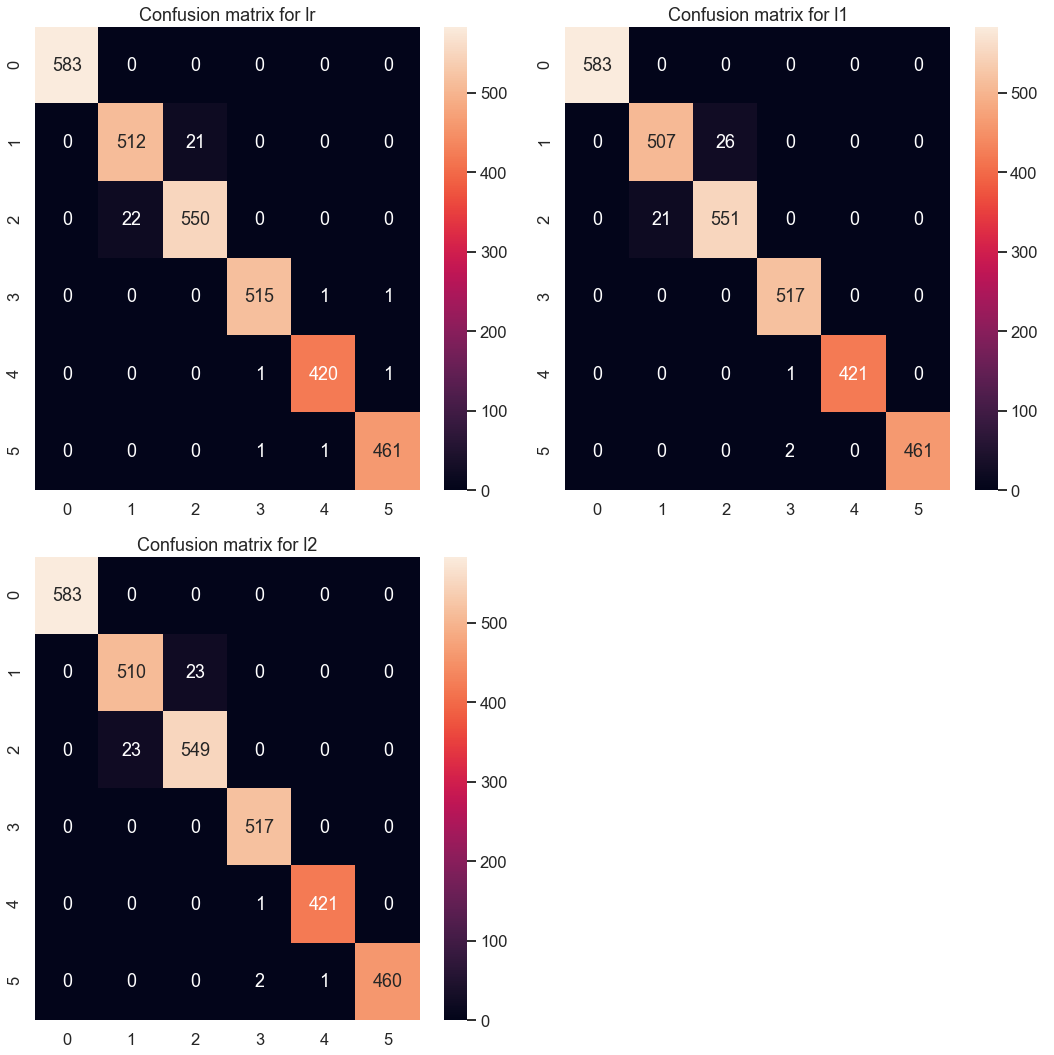

In [246]:
fig,axes = plt.subplots(nrows=2,ncols=2)
axes = axes.flatten() #We flatten it in one dimensional for the loop constructs
fig.set_size_inches(15,15)

coef_label = ['lr','l1','l2']
axes[-1].axis('off') ## As we only have 3 heat maps so we disable the fourth

for lab,ax in zip(coef_label,axes[:-1]):
    sns.heatmap(cm[lab],ax=ax,annot=True,fmt='d')
    ax.set_title('Confusion matrix for'+ " "+ str(lab))
    
plt.tight_layout()
plt.show()
    

In [249]:
le.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

# INFERENCES

* Hence we observe that activity 'Laying' which was encoded as 0 has been predicted with a 100% accuracy for all the three models fitted.


* Finally, the activities of 'Sitting' and 'Standing' - encoded as 1 and 0 respectively have been often confused with one another in all the three models.

## END